# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [269]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
merged_data = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")

# Display the data table for preview
print(merged_data.head())




  Mouse ID Drug Regimen   Sex  Age_months  Weight (g)  Timepoint  \
0     k403     Ramicane  Male          21          16          0   
1     k403     Ramicane  Male          21          16          5   
2     k403     Ramicane  Male          21          16         10   
3     k403     Ramicane  Male          21          16         15   
4     k403     Ramicane  Male          21          16         20   

   Tumor Volume (mm3)  Metastatic Sites  
0           45.000000                 0  
1           38.825898                 0  
2           35.014271                 1  
3           34.223992                 1  
4           32.997729                 1  


In [194]:
# Checking the number of mice.

num_mice = merged_data["Mouse ID"].nunique()
print(num_mice)


249


In [227]:
# Our data should be uniquely identified by Mouse ID and Timepoint

# Our data should be uniquely identified by Mouse ID and Timepoint
duplicate_mice = merged_data[merged_data.duplicated(subset=["Mouse ID", "Timepoint"], keep=False)]

# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint

duplicate_mice_ids = duplicate_mice["Mouse ID"].unique()

print(duplicate_mice_ids)


['g989']


In [233]:
# Optional: Get all the data for the duplicate mouse ID. 

# Filter the DataFrame for the duplicate mouse ID 'g989' and select the specified columns
duplicate_mouse_info = merged_data.loc[merged_data["Mouse ID"] == 'g989', ["Mouse ID", "Timepoint", "Tumor Volume (mm3)", "Metastatic Sites", "Drug Regimen", "Sex", "Age_months", "Weight (g)"]]

# Print the information in an organized table format
print(duplicate_mouse_info.to_string(index=False))




Mouse ID  Timepoint  Tumor Volume (mm3)  Metastatic Sites Drug Regimen    Sex  Age_months  Weight (g)
    g989          0           45.000000                 0     Propriva Female          21          26
    g989          0           45.000000                 0     Propriva Female          21          26
    g989          5           48.786801                 0     Propriva Female          21          26
    g989          5           47.570392                 0     Propriva Female          21          26
    g989         10           51.745156                 0     Propriva Female          21          26
    g989         10           49.880528                 0     Propriva Female          21          26
    g989         15           51.325852                 1     Propriva Female          21          26
    g989         15           53.442020                 0     Propriva Female          21          26
    g989         20           55.326122                 1     Propriva Female     

In [270]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Print the clean DataFrame in an organized table format
print(clean_data.to_string(index=False))


Mouse ID Drug Regimen    Sex  Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
    k403     Ramicane   Male          21          16          0           45.000000                 0
    k403     Ramicane   Male          21          16          5           38.825898                 0
    k403     Ramicane   Male          21          16         10           35.014271                 1
    k403     Ramicane   Male          21          16         15           34.223992                 1
    k403     Ramicane   Male          21          16         20           32.997729                 1
    k403     Ramicane   Male          21          16         25           33.464577                 1
    k403     Ramicane   Male          21          16         30           31.099498                 1
    k403     Ramicane   Male          21          16         35           26.546993                 1
    k403     Ramicane   Male          21          16         40           24.36550

In [271]:
# Checking the number of mice in the clean DataFrame.
# Create a clean DataFrame by dropping the duplicate mouse by its ID
clean_data = merged_data.drop_duplicates(subset=["Mouse ID", "Timepoint"])

# Drop the rows corresponding to the mouse with ID 'g989'
clean_data = clean_data[clean_data["Mouse ID"] != 'g989']

# Checking the number of mice in the clean DataFrame
num_mice_clean = clean_data["Mouse ID"].nunique()
print(num_mice_clean)


248


## Summary Statistics

In [238]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

# Group the data by Drug Regimen and calculate the summary statistics
summary_stats = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg(['mean', 'median', 'var', 'std', 'sem'])

# Rename the columns for clarity
summary_stats.columns = ['Mean', 'Median', 'Variance', 'Standard Deviation', 'SEM']


summary_stats





,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [239]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)
# Using the aggregation method, produce the same summary statistics in a single line

# Generate summary statistics table using aggregation method
summary_stats = merged_data.groupby("Drug Regimen")["Tumor Volume (mm3)"].agg([('Mean', 'mean'), ('Median', 'median'), ('Variance', 'var'), ('Standard Deviation', 'std'), ('SEM', 'sem')])

# Display the summary statistics DataFrame
summary_stats


,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.322552,50.854632,42.351070,6.507770,0.512884
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

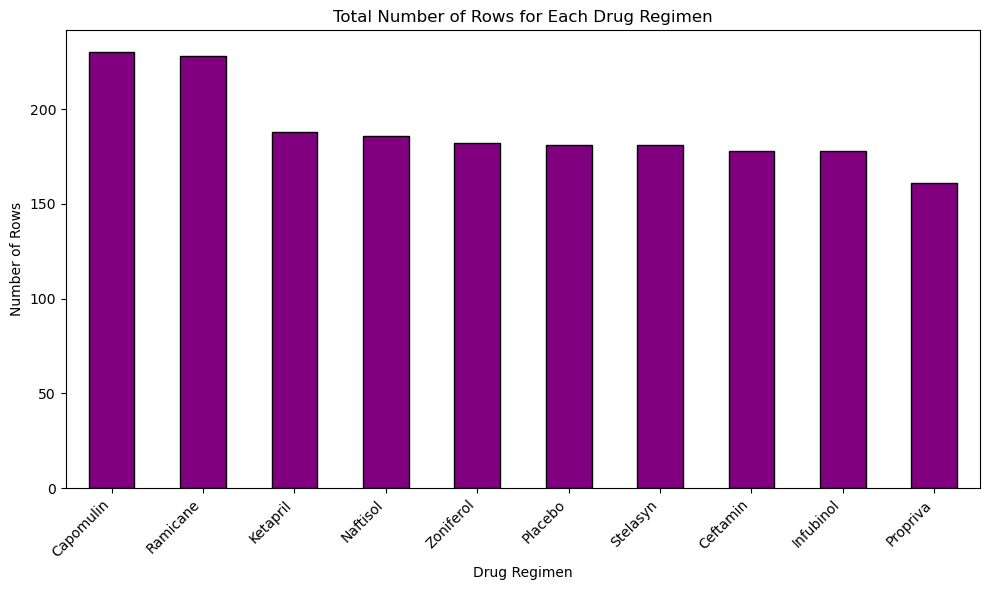

In [246]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.

drug_regimen_counts = merged_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Plot the bar plot using Pandas
ax = drug_regimen_counts.plot(kind='bar', figsize=(10, 6), color='purple', edgecolor='black')

# Add title and labels
ax.set_title('Total Number of Rows for Each Drug Regimen')
ax.set_xlabel('Drug Regimen')
ax.set_ylabel('Number of Rows')
ax.set_xticklabels(drug_regimen_counts.index, rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Display the plot
plt.tight_layout()
plt.show()

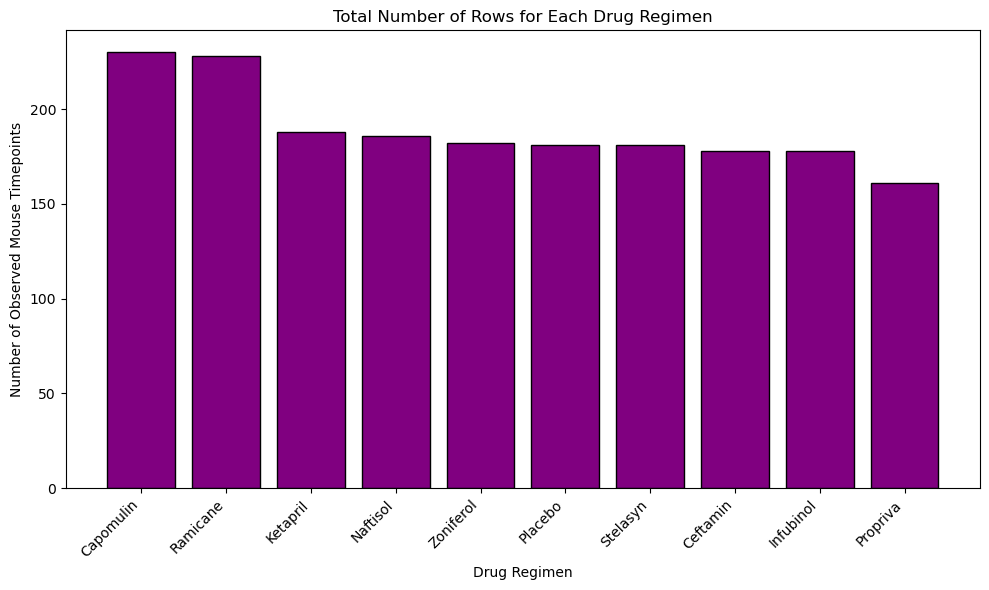

In [247]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.

import matplotlib.pyplot as plt

# Calculate the total number of rows (Mouse ID/Timepoints) for each drug regimen
drug_regimen_counts = merged_data.groupby('Drug Regimen').size().sort_values(ascending=False)

# Set up the figure and axis
plt.figure(figsize=(10, 6))

# Plot the bar plot using pyplot with pink color
plt.bar(drug_regimen_counts.index, drug_regimen_counts, color='purple', edgecolor='black')

# Add title and labels
plt.title('Total Number of Rows for Each Drug Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Observed Mouse Timepoints')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility

# Show plot
plt.tight_layout()
plt.show()

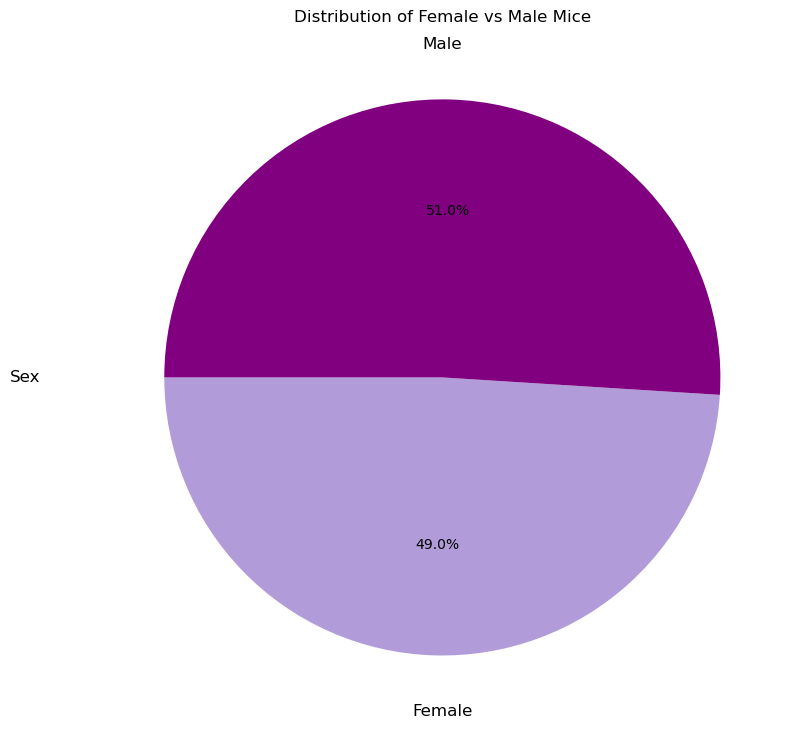

In [273]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


import pandas as pd
import matplotlib.pyplot as plt

# Define the distribution of female versus male mice
gender_distribution = pd.Series([49, 51], index=['Male', 'Female'])

# Plot the pie plot using Pandas
ax = gender_distribution.plot(kind='pie', figsize=(8, 8), autopct='%1.1f%%', startangle=180, colors=['#B19CD9', 'purple'], labels=['', ''])

# Manually add labels inside the pie chart
ax.text(0, 1.2, 'Male', color='black', fontsize=12, ha='center', va='center')
ax.text(0, -1.2, 'Female', color='black', fontsize=12, ha='center', va='center')

# Add label for the pie
ax.text(-1.5, 0, 'Sex', color='black', fontsize=12, ha='center', va='center')

# Add title
ax.set_title('Distribution of Female vs Male Mice')

# Equal aspect ratio ensures that pie is drawn as a circle
ax.set_aspect('equal')

# Display the plot
plt.tight_layout()
plt.show()

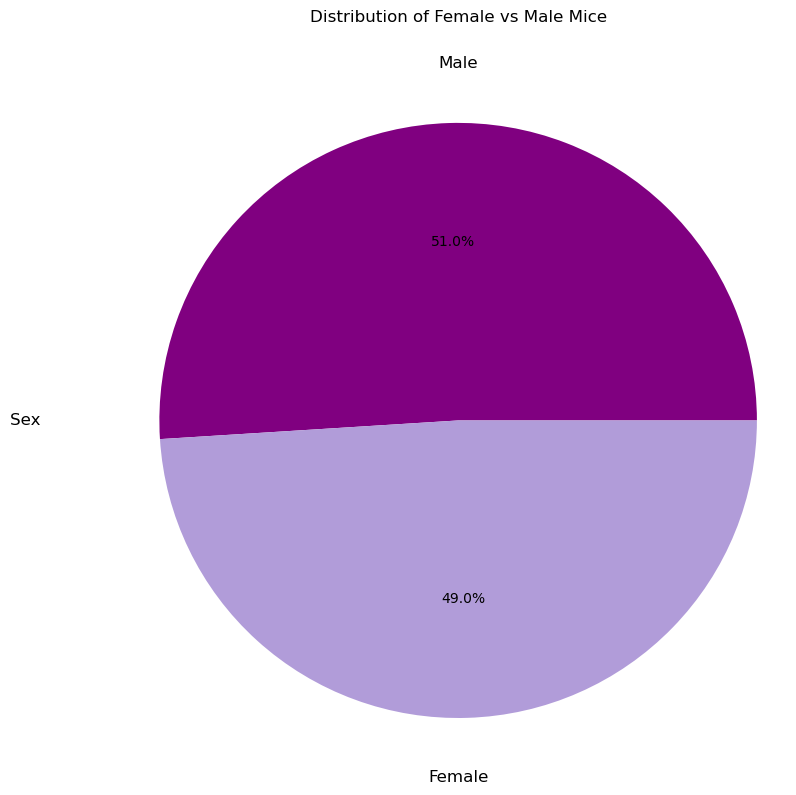

In [272]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
import matplotlib.pyplot as plt

# Define the distribution of female versus male mice
gender_distribution = [51, 49]  # 51% Female, 49% Male
labels = ['Female', 'Male']
colors = ['#B19CD9', 'purple']

# Plot the pie chart using pyplot
plt.figure(figsize=(8, 8))
plt.pie(gender_distribution, labels=['', ''], autopct='%1.1f%%', startangle=0, colors=colors[::-1])

# Manually add labels with black color and adjusted positions
plt.text(-1.5, 0, 'Sex ', color='black', fontsize=12, ha='left', va='center')
plt.text(0, 1.2, 'Male', color='black', fontsize=12, ha='center', va='center')
plt.text(0, -1.2, 'Female', color='black', fontsize=12, ha='center', va='center')


# Add title with further adjusted position to avoid overlapping
plt.title('Distribution of Female vs Male Mice', y=1.1)




# Equal aspect ratio ensures that pie is drawn as a circle
plt.axis('equal')

# Display the plot
plt.tight_layout()
plt.show()


## Quartiles, Outliers and Boxplots

In [215]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse
 
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Start by getting the last (greatest) timepoint for each mouse

# 1. Get the last (greatest) timepoint for each mouse
max_timepoints = merged_data.groupby('Mouse ID')['Timepoint'].max()

# 2. Filter the DataFrame to include only the specified treatment regimens
selected_regimens = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
filtered_df = merged_data[merged_data['Drug Regimen'].isin(selected_regimens)]

# 3. Merge this filtered DataFrame with the original DataFrame to get the tumor volume at the last timepoint for each mouse
final_tumor_volume = pd.merge(max_timepoints, filtered_df, on=['Mouse ID', 'Timepoint'], how='inner')

# Display the final tumor volume DataFrame
print(final_tumor_volume.to_string(index=False))




Mouse ID  Timepoint Drug Regimen    Sex  Age_months  Weight (g)  Tumor Volume (mm3)  Metastatic Sites
    a203         45    Infubinol Female          20          23           67.973419                 2
    a251         45    Infubinol Female          21          25           65.525743                 1
    a275         45     Ceftamin Female          20          28           62.999356                 3
    a411         45     Ramicane   Male           3          22           38.407618                 1
    a444         45     Ramicane Female          10          25           43.047543                 0
    a520         45     Ramicane   Male          13          21           38.810366                 1
    a577         30    Infubinol Female           6          25           57.031862                 2
    a644         45     Ramicane Female           7          17           32.978522                 1
    a685         45    Infubinol   Male           8          30           66.08306

In [245]:
# Put treatments into a list for for loop (and later for plot labels)

treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Iterate over each treatment regimen
for treatment in selected_regimens:
    # Filter the data for the current treatment regimen
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Calculate the quartiles (Q1 and Q3)
    quartiles = treatment_data.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]
    
    # Calculate the IQR (Interquartile Range)
    IQR = Q3 - Q1
    
    # Determine the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Identify potential outliers
    potential_outliers = treatment_data[(treatment_data < lower_bound) | (treatment_data > upper_bound)]
    
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
# Create a dictionary to store tumor volumes for each drug regimen
tumor_volumes = {}

# Iterate over each treatment regimen
for treatment in selected_regimens:
    # Filter the DataFrame for the current treatment regimen
    treatment_data = final_tumor_volume[final_tumor_volume['Drug Regimen'] == treatment]
    
    # Extract tumor volumes for the current treatment regimen
    tumor_volumes[treatment] = treatment_data['Tumor Volume (mm3)']

    # add subset 
tumor_volumes = {}

# Iterate over each treatment regimen
for treatment in selected_regimens:
    # Filter the DataFrame for the current treatment regimen
    treatment_data = final_tumor_volume.loc[final_tumor_volume['Drug Regimen'] == treatment, 'Tumor Volume (mm3)']
    
    # Extract tumor volumes for the current treatment regimen
    tumor_volumes[treatment] = treatment_data
    
    # Determine outliers using upper and lower bounds
potential_outliers = {}

# Iterate over each treatment regimen
for treatment, volumes in tumor_volumes.items():
    # Calculate the quartiles (Q1 and Q3) for the tumor volumes
    quartiles = volumes.quantile([0.25, 0.75])
    Q1 = quartiles[0.25]
    Q3 = quartiles[0.75]

    # Calculate the interquartile range (IQR)
    IQR = Q3 - Q1

    # Define the lower and upper bounds
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Find potential outliers
    outliers = volumes.loc[(volumes < lower_bound) | (volumes > upper_bound)]

    # Store potential outliers in the dictionary
    potential_outliers[treatment] = outliers

# Display potential outliers for each treatment regimen
for treatment, outliers in potential_outliers.items():
    print(f"{treatment}'s potential outliers:")
    print(outliers)
    print()


Capomulin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Ramicane's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)

Infubinol's potential outliers:
15    36.321346
Name: Tumor Volume (mm3), dtype: float64

Ceftamin's potential outliers:
Series([], Name: Tumor Volume (mm3), dtype: float64)



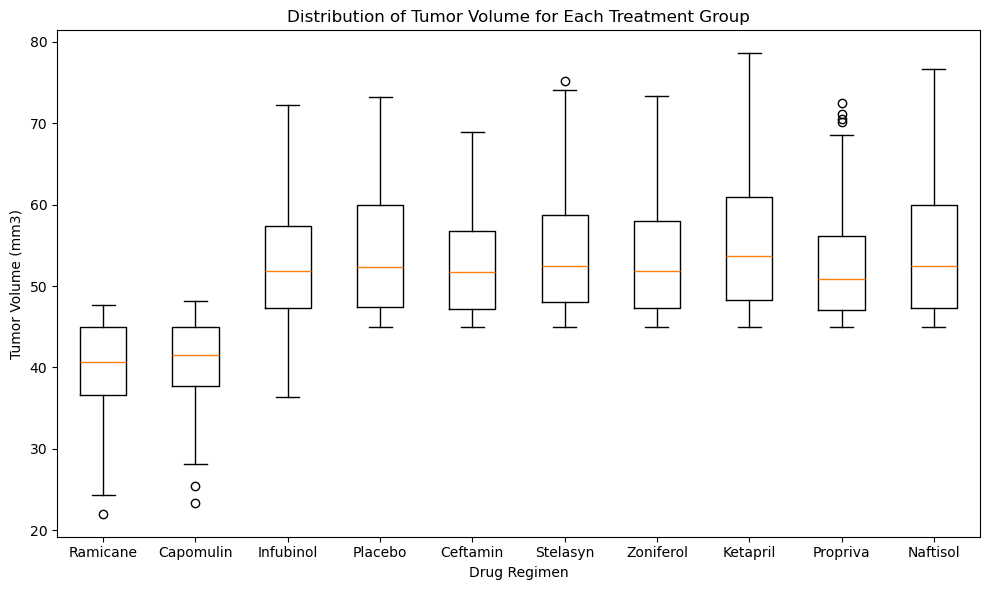

In [219]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
# Import necessary libraries
import matplotlib.pyplot as plt

# Create a list of tumor volume data for each treatment group
data = [merged_data[merged_data['Drug Regimen'] == regimen]['Tumor Volume (mm3)'].values for regimen in merged_data['Drug Regimen'].unique()]

# Generate the box plot using Matplotlib
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=merged_data['Drug Regimen'].unique())

# Set plot title and labels
plt.title('Distribution of Tumor Volume for Each Treatment Group')
plt.xlabel('Drug Regimen')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.tight_layout()
plt.show()


## Line and Scatter Plots

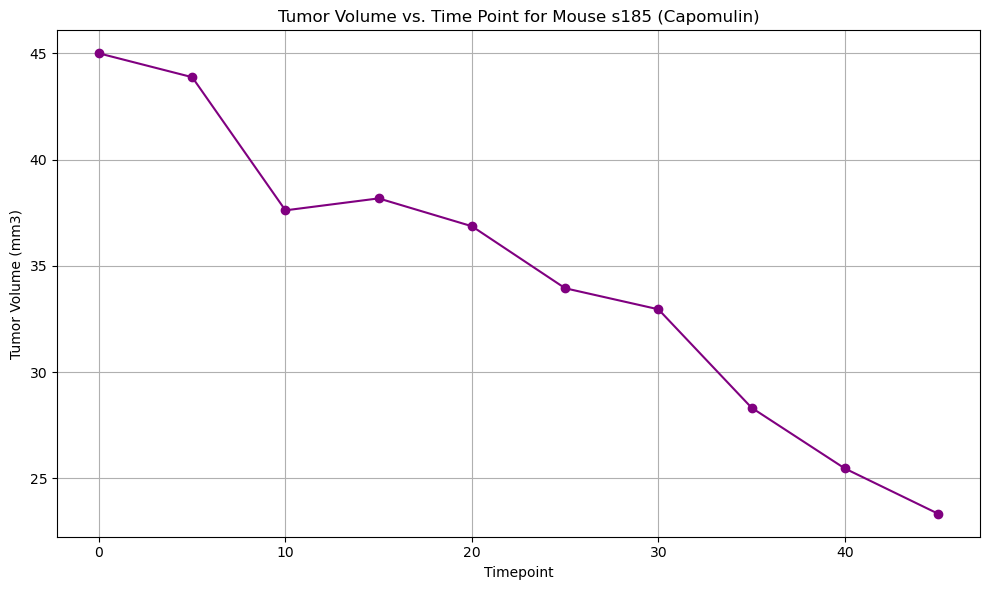

In [262]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the data to include only mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Choose a single mouse from the filtered data (e.g., the first mouse)
mouse_id = capomulin_data['Mouse ID'].iloc[0]

# Filter the data further to include only records for the selected mouse
mouse_data = capomulin_data[capomulin_data['Mouse ID'] == mouse_id]

# Plot tumor volume vs. time point for the selected mouse
plt.figure(figsize=(10, 6))
plt.plot(mouse_data['Timepoint'], mouse_data['Tumor Volume (mm3)'], marker='o', color='#800080', linestyle='-')

# Set plot title and labels
plt.title(f'Tumor Volume vs. Time Point for Mouse {mouse_id} (Capomulin)')
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


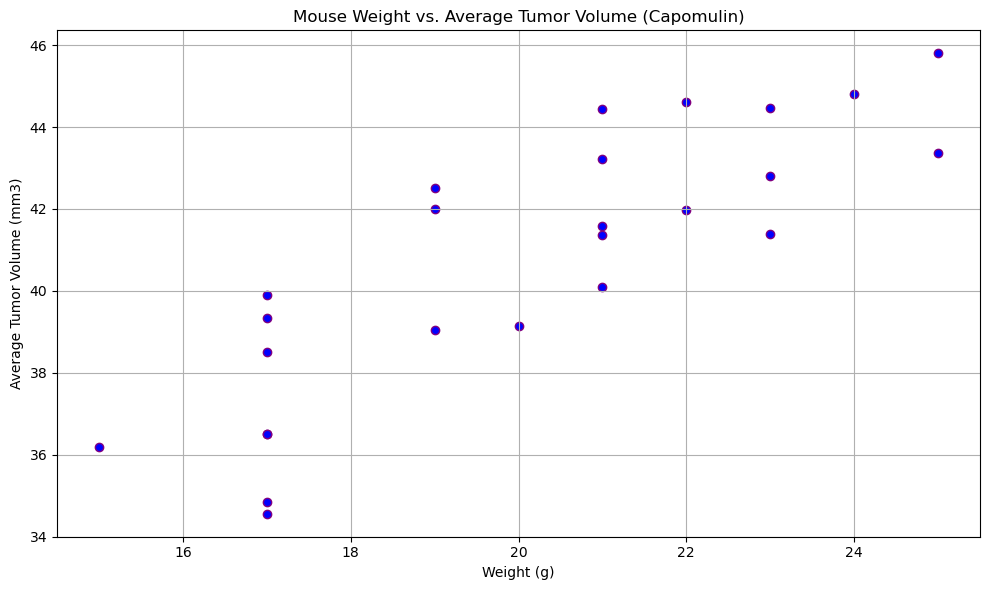

In [251]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
# Import necessary libraries
import matplotlib.pyplot as plt

# Filter the data to include only mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Plot average tumor volume vs. mouse weight
plt.figure(figsize=(10, 6))
plt.scatter(average_data['Weight (g)'], average_data['Tumor Volume (mm3)'], color='b', edgecolor='purple')

# Set plot title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()


## Correlation and Regression

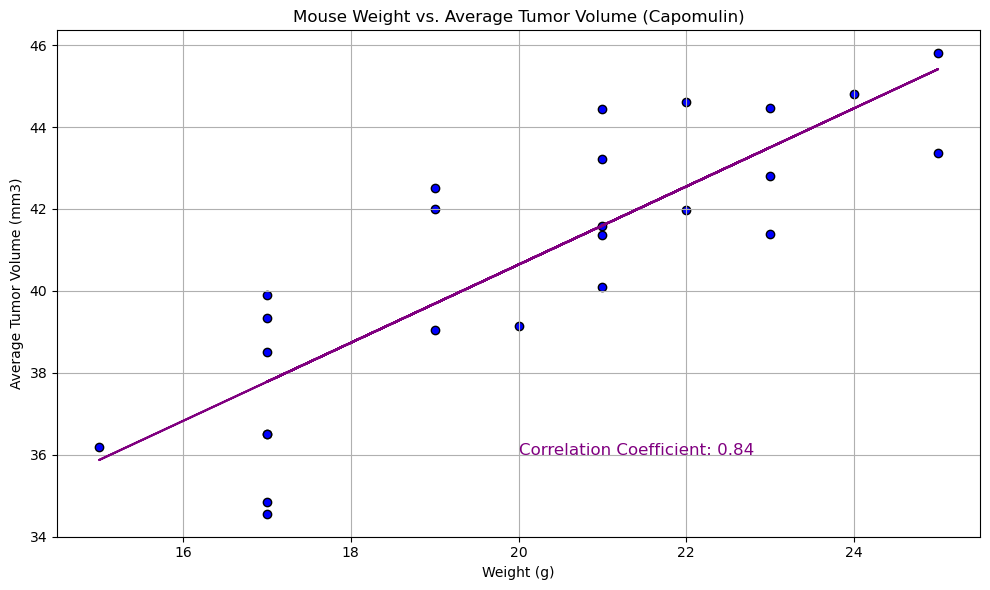

Correlation Coefficient: 0.84


In [265]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
# Import necessary libraries
import matplotlib.pyplot as plt
from scipy.stats import linregress

# Filter the data to include only mice treated with Capomulin
capomulin_data = merged_data[merged_data['Drug Regimen'] == 'Capomulin']

# Group the data by mouse ID and calculate the average tumor volume and weight for each mouse
average_data = capomulin_data.groupby('Mouse ID').agg({'Weight (g)': 'mean', 'Tumor Volume (mm3)': 'mean'})

# Extract weight and tumor volume data
weight = average_data['Weight (g)']
tumor_volume = average_data['Tumor Volume (mm3)']

# Calculate correlation coefficient
correlation_coefficient = weight.corr(tumor_volume)

# Perform linear regression
slope, intercept, rvalue, pvalue, stderr = linregress(weight, tumor_volume)

# Plot scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(weight, tumor_volume, color='b', edgecolor='black')

# Plot regression line
plt.plot(weight, slope * weight + intercept, color='#800080')

# Set plot title and labels
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin)')
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

# Add correlation coefficient to the plot
plt.text(20, 36, f'Correlation Coefficient: {correlation_coefficient:.2f}', fontsize=12, color='#800080')

# Show the plot
plt.grid(True)
plt.tight_layout()
plt.show()

# Print correlation coefficient
print(f'Correlation Coefficient: {correlation_coefficient:.2f}')
